# Modeling And Machine Learning.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_pickle("../data/train_data_wrangle.plk")
test = pd.read_pickle("../data/test_data_wrangle.plk")

RANDOM_STATE = 42

In [3]:
print(train['class'].unique(), ' ', test['class'].unique())

[3 2 1]   [2 3 1]


## Applying machine learning techniques.

In [4]:
X_train = train.drop('class',axis=1)
y_train = train['class']

X_test = test.drop('class',axis=1)
y_test = test['class']

In [5]:
!pip install yellowbrick
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\rahul\anaconda3\lib\site-packages (0.3.3)
Requirement not upgraded as not directly required: scipy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: numpy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (1.13.3)
Requirement not upgraded as not directly required: scikit-learn in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

def classifier_scores(clf, phase, x, y, to_print=False, class_print=False, func=accuracy_score):
    """A function used for fitting the classifier, predicting and printing accuracy scores."""
    if phase == 'train':
        clf.fit(x, y)
    if to_print:
        print('Accuracy score of classifier on','train' if phase=='train' else phase,'is',func(clf.predict(x), y))
    
    return clf

def show_report(clf, X, y, type_of='confusion', phase='test'):
    """Function to plot classification report, can also plot confusion matrix."""
    if type_of == 'classification':
        print('Training' if phase=='train' else 'Test','classification report.')
        report_type = ClassificationReport(clf, cmap='Blues')
    else:        
        print('Training' if phase=='train' else 'Test','confusion matrix.')
        report_type = ConfusionMatrix(clf, cmap='Blues')
    if phase == 'train':
        report_type.fit(X, y)
    report_type.score(X, y)
    report_type.poof()

## LogisticRegression will be selected as a base model.

In [7]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

_ = classifier_scores(logreg, 'train', X_train, y_train, True)
_ = classifier_scores(logreg, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.926033934252
Accuracy score of classifier on test is 0.928529754959
Wall time: 99.3 ms


### Tuning parameters for logistic regression

In [8]:
classifiers = [] # classifiers
# the grid of parameters to search over
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':Cs}
logreg = LogisticRegression()

gridSearchClf = GridSearchCV(logreg, parameters)
classifier_scores(gridSearchClf, 'train', X_train, y_train)

c = gridSearchClf.best_params_['C']
print('C value:',c)
logreg_C = LogisticRegression(C = c)

_ = classifier_scores(logreg_C, 'train', X_train, y_train, True)
_ = classifier_scores(logreg_C, 'test', X_test, y_test, True)

C value: 1000
Accuracy score of classifier on train is 0.952279957582
Accuracy score of classifier on test is 0.946616102684


Training confusion matrix.


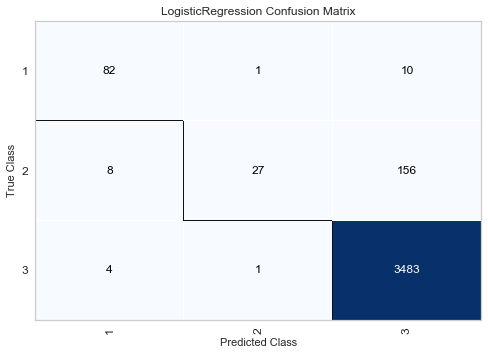

Test confusion matrix.


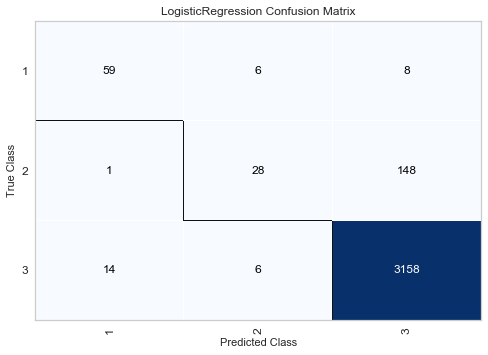

In [10]:
#show_report(logreg_C, X_train, y_train, 'classification', 'train')
#show_report(logreg_C, X_test, y_test, 'classification', 'test')
show_report(logreg_C, X_train, y_train, 'confusion', 'train')
show_report(logreg_C, X_test, y_test, 'confusion', 'test')
classifiers.append(logreg_C)

C of 1000 did a better prediction than default.

But when it comes to prediction of **class 2**, it did not predict well.

**Perform cross validation.**

In [11]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=RANDOM_STATE)

logregmodelCV = LogisticRegression(C=c)
logregmodelCV.fit(X_train, y_train)
scorelogregCV = cross_val_score(logregmodelCV, X_train, y_train, cv=kfold)
testscorelogregCV = cross_val_score(logregmodelCV, X_test, y_test, cv=kfold)

print('10-fold cross validation average accuracy on train set is {:.5f}'.format(scorelogregCV.mean()))
print('10-fold cross validation average accuracy on test set is {:.5f}'.format(testscorelogregCV.mean()))

10-fold cross validation average accuracy on train set is 0.95147
10-fold cross validation average accuracy on test set is 0.94195


Training confusion matrix.


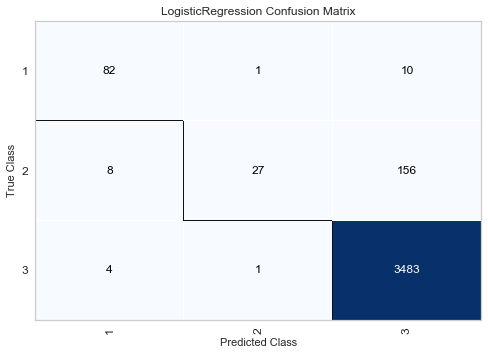

Test confusion matrix.


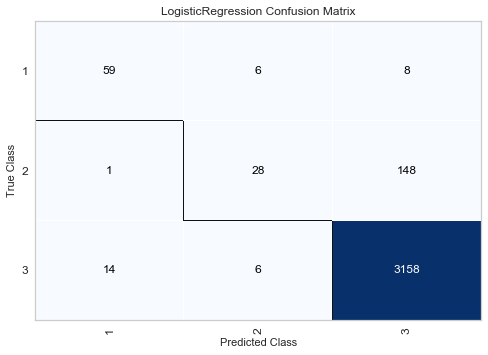

In [12]:
#show_report(logregmodelCV, X_train, y_train, 'classification', 'train')
#show_report(logregmodelCV, X_test, y_test, 'classification', 'test')
show_report(logregmodelCV, X_train, y_train, 'confusion', 'train')
show_report(logregmodelCV, X_test, y_test, 'confusion', 'test')
classifiers.append(logregmodelCV)

After cross_validation compared with logreg_C accuracy was a bit lower, will stick with logreg_C.

Applying regularizations for logreg_C.

L2 (default) regularization.
Training confusion matrix.


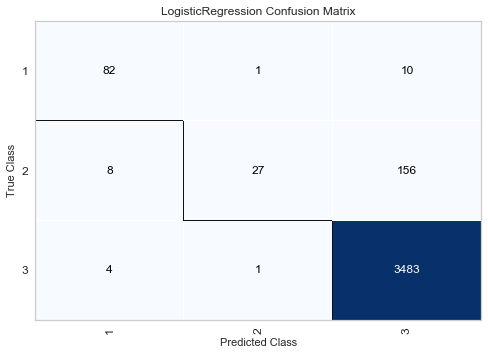

Test confusion matrix.


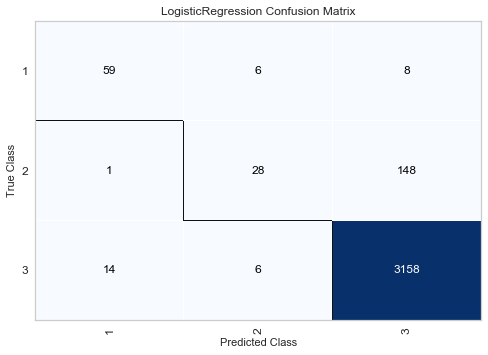

In [13]:
print('L2 (default) regularization.')
#show_report(logreg_C, X_train, y_train, 'classification', 'train')
#show_report(logreg_C, X_test, y_test, 'classification', 'test')
show_report(logreg_C, X_train, y_train, 'confusion', 'train')
show_report(logreg_C, X_test, y_test, 'confusion', 'test')

In [14]:
logreg_C_l1 = LogisticRegression(penalty='l1', C=c)

_ = classifier_scores(logreg_C_l1, 'train', X_train, y_train, True)
_ = classifier_scores(logreg_C_l1, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.957051961824
Accuracy score of classifier on test is 0.949533255543


L1 regularization
Training confusion matrix.


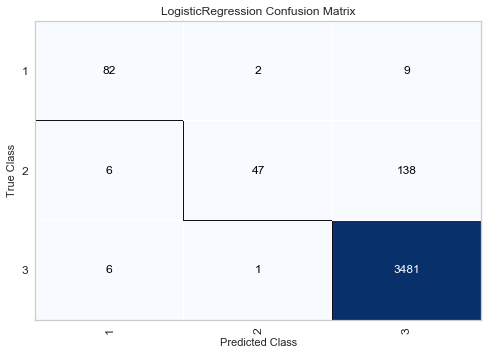

Test confusion matrix.


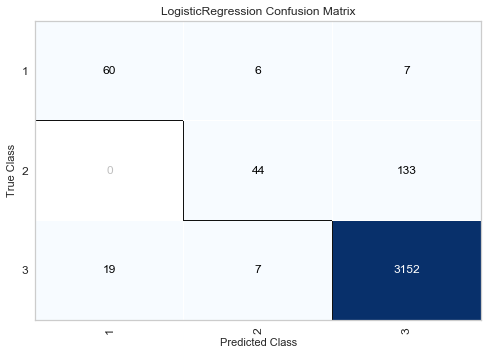

In [15]:
print('L1 regularization')
#show_report(logreg_C_l1, X_train, y_train, 'classification', 'train')
#show_report(logreg_C_l1, X_test, y_test, 'classification', 'test')
show_report(logreg_C_l1, X_train, y_train, 'confusion', 'train')
show_report(logreg_C_l1, X_test, y_test, 'confusion', 'test')
classifiers.append(logreg_C_l1)

With **L2, L1** regularization(s) the model performed bad in predicting **class 2** in both training and testing phases, by looking at the precision, recall, F1 score.

Logistic regression was not a good model here.

## Base model (LogisticRegression) was not a good classifier in predicting classes.
## Plus from the observation we see that we have an imbalanced data set, so will be applying different techniques to get better classification. 

Training confusion matrix.


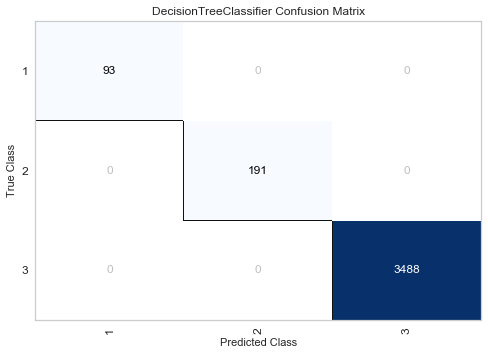

Test confusion matrix.


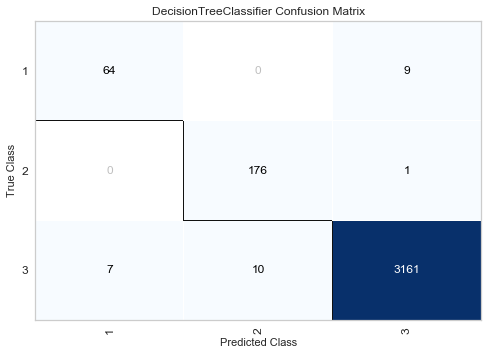

In [16]:
# Perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)

train_score = classifier_scores(dtree_clf, 'train', X_train, y_train)
test_score = classifier_scores(dtree_clf, 'test', X_test, y_test)
#show_report(dtree_clf, X_train, y_train, 'classification', 'train')
#show_report(dtree_clf, X_test, y_test, 'classification', 'test')
show_report(dtree_clf, X_train, y_train, 'confusion', 'train')
show_report(dtree_clf, X_test, y_test, 'confusion', 'test')
classifiers.append(dtree_clf)

In [17]:
# Perform RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_clf, 'train', X_train, y_train, True)
_ = classifier_scores(rf_clf, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.99008168028


Training confusion matrix.


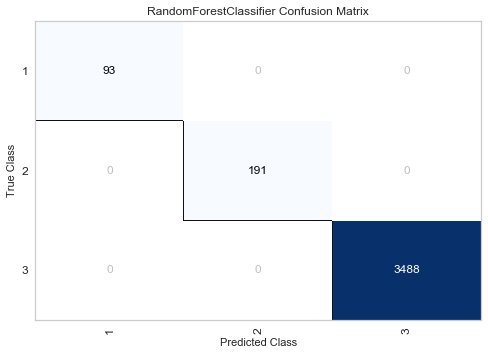

Test confusion matrix.


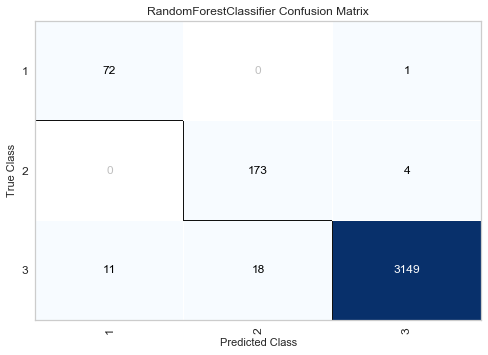

In [18]:
#show_report(rf_clf, X_train, y_train, 'classification', 'train')
#show_report(rf_clf, X_test, y_test, 'classification', 'test')
show_report(rf_clf, X_train, y_train, 'confusion', 'train')
show_report(rf_clf, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_clf)

In [19]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=RANDOM_STATE)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

rf_oversampler = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_oversampler, 'train', os_features, os_labels, True)
_ = classifier_scores(rf_oversampler, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.992998833139


Training confusion matrix.


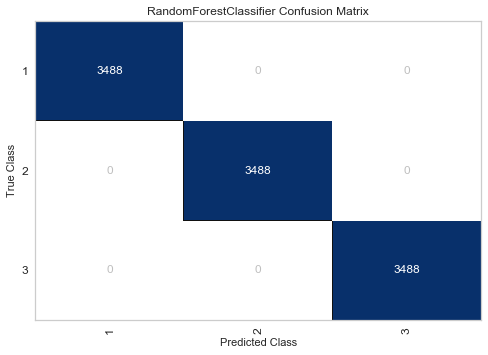

Test confusion matrix.


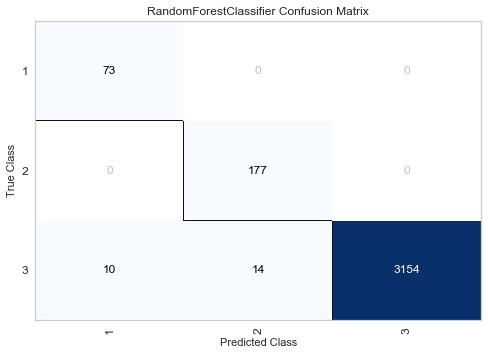

In [20]:
#show_report(rf_oversampler, os_features, os_labels, 'classification', 'train')
#show_report(rf_oversampler, X_test, y_test, 'classification', 'test')
show_report(rf_oversampler, os_features, os_labels, 'confusion', 'train')
show_report(rf_oversampler, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_oversampler)

SMOTE performs over sampling on the minority class, let's perform under sampling on the majority class.

In [21]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler(random_state=RANDOM_STATE)
us_features, us_labels = under_sampler.fit_sample(X_train,y_train)

rf_undersampler = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_undersampler, 'train', us_features, us_labels, True)
_ = classifier_scores(rf_undersampler, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.948949824971


Training confusion matrix.


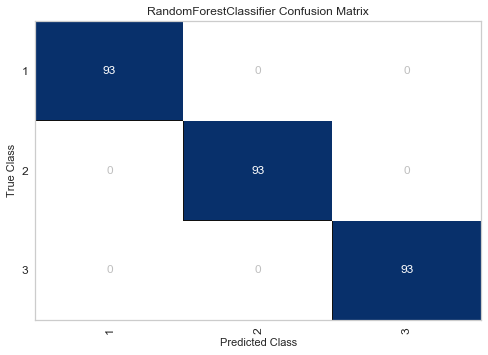

Test confusion matrix.


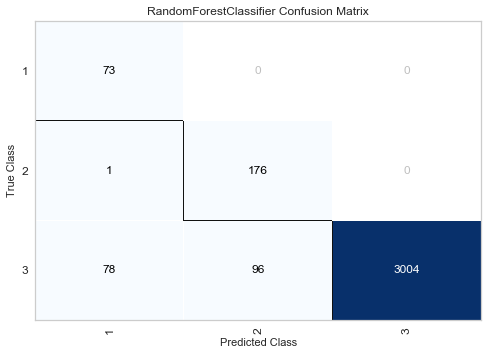

In [22]:
#show_report(rf_undersampler, us_features, us_labels, 'classification', 'train')
#show_report(rf_undersampler, X_test, y_test, 'classification', 'test')
show_report(rf_undersampler, us_features, us_labels, 'confusion', 'train')
show_report(rf_undersampler, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_undersampler)

By looking at the confusion matrix, under sampling did not predict **class 3** properly.

Will perform under sampling of majority class, over sampling of minority class together and see how it predicts.

In [23]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=RANDOM_STATE)
sme_features, sme_labels = sme.fit_sample(X_train,y_train)
rf_smoteenn = RandomForestClassifier(random_state=RANDOM_STATE)

_ = classifier_scores(rf_smoteenn, 'train', sme_features, sme_labels, True)
_ = classifier_scores(rf_smoteenn, 'test', X_test, y_test, True)

Accuracy score of classifier on train is 0.999775960569
Accuracy score of classifier on test is 0.988331388565


Training confusion matrix.


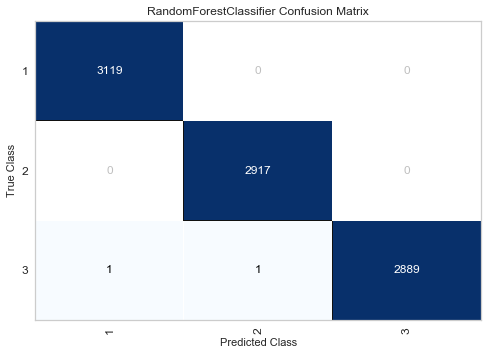

Test confusion matrix.


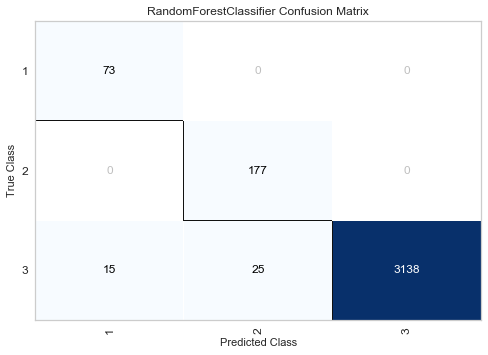

In [24]:
#show_report(rf_smoteenn, sme_features, sme_labels, 'classification', 'train')
#show_report(rf_smoteenn, X_test, y_test, 'classification', 'test')
show_report(rf_smoteenn, sme_features, sme_labels, 'confusion', 'train')
show_report(rf_smoteenn, X_test, y_test, 'confusion', 'test')
classifiers.append(rf_smoteenn)

SMOTEENN did a good prediction but a little less in class 3.

But we see **RandomForestClassifier** with **SMOTE** did a good prediction on the test.

### Tunning hyperparameters for RandomForestClassifier.

In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict

ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto/sqrt'",
        RandomForestClassifier( max_features='auto', oob_score=True, random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier( max_features='log2', oob_score=True, random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier( max_features=None,   oob_score=True, random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(os_features, os_labels)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

### Plot OOB errors.

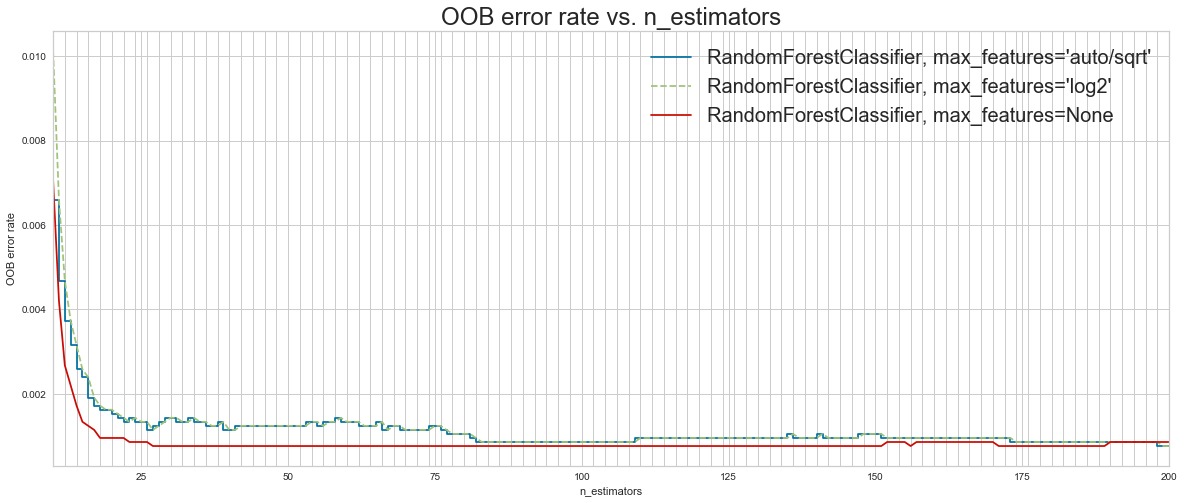

In [26]:
from matplotlib.ticker import MultipleLocator

marker = ['steps','--','-']
i=0

# Generate the "OOB error rate" vs. "n_estimators" plot.
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)

spacing = 2.0
minorLocator = MultipleLocator(spacing)
ax.yaxis.set_minor_locator(minorLocator)
ax.xaxis.set_minor_locator(minorLocator)
ax.grid(which = 'minor')

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, linestyle=marker[i], label=label)
    i+=1

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right", fontsize=20)
plt.title("OOB error rate vs. n_estimators", fontsize=24)
plt.show()

From the observation with max_features=**None** the error rate remains constant around n_estimators = 27, and error rate keeps on decreasing for other max_features and remains constant around n_estimators = 80, 173.

Tuning hyperparameters on the classifier (from SMOTE).

In [27]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(10, 200, num = 200)]

max_features = ['auto', 'sqrt', 'log2', None]

max_depth = [int(x) for x in np.linspace(10, 100, num = 100)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

warm_start= [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'warm_start': warm_start}
#print(random_grid)

# Use the random grid to search for best hyperparameters
random_search_cv_ = RandomizedSearchCV(estimator = rf_oversampler,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 5,
                               verbose=10,
                               random_state=RANDOM_STATE,
                               n_jobs = -1)

Training confusion matrix.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


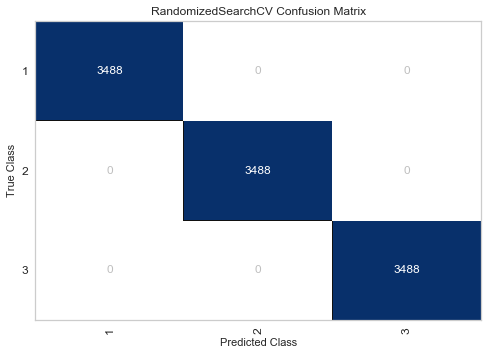

Test confusion matrix.


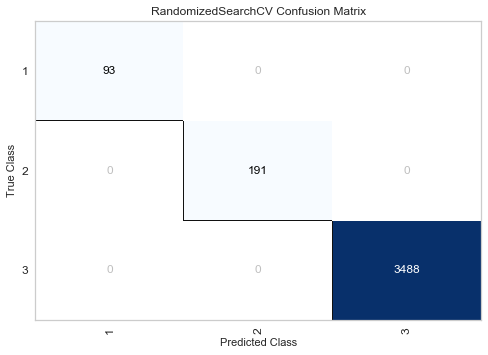

Test confusion matrix.


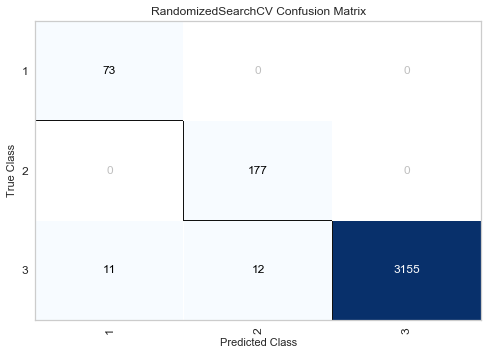

{'warm_start': False, 'n_estimators': 173, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 24, 'bootstrap': False}


In [28]:
show_report(random_search_cv_, os_features, os_labels, 'confusion', 'train')
show_report(random_search_cv_, X_train, y_train, 'confusion', 'test')
show_report(random_search_cv_, X_test, y_test, 'confusion', 'test')
print(random_search_cv_.best_params_)
classifiers.append(random_search_cv_)

#### From tuning the hyperparameters on the Random forest classifer

In [29]:
random_search_cv_.best_params_

{'bootstrap': False,
 'max_depth': 24,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 173,
 'warm_start': False}

#### this model performs optimal.

Using SMOTE with RandomizedSearchCV performed better amongst the classifiers.

## From the datasets (both training and testing) we encountered highly imbalanced datasets, so we did oversampling on the minoirty classes using SMOTE which improved the classification performance for the training phase.
## Using RandomizedSearchCV further tuning of the hyperparameters were done and an optimal model for classifying was found.

## Plot a ROC curve

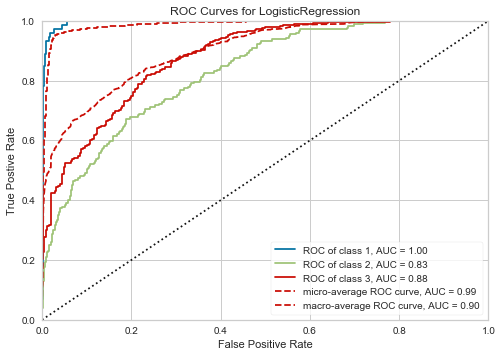

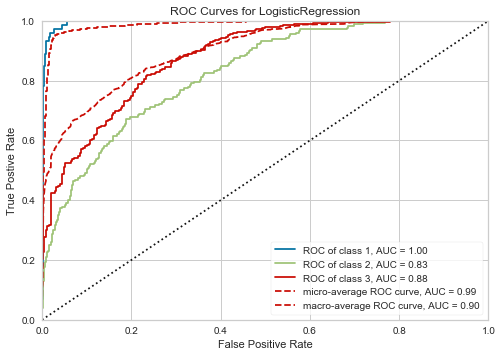

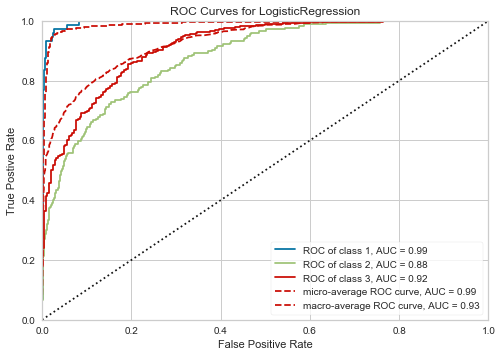

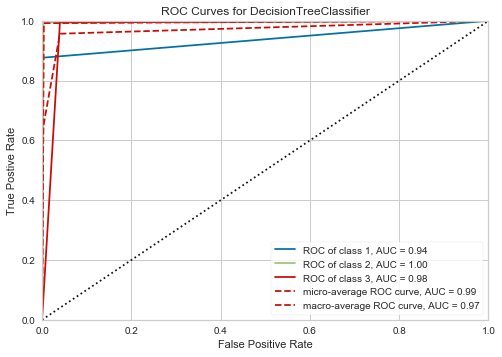

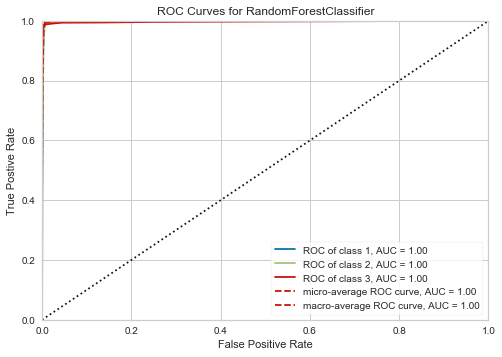

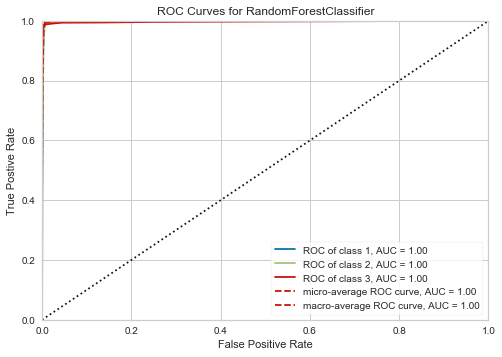

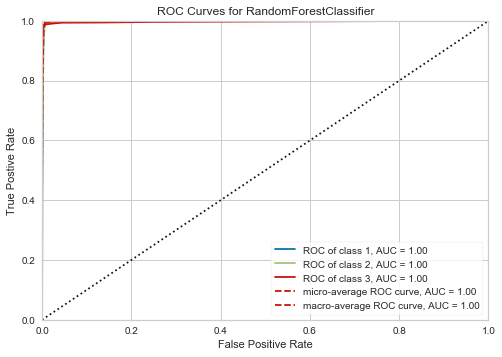

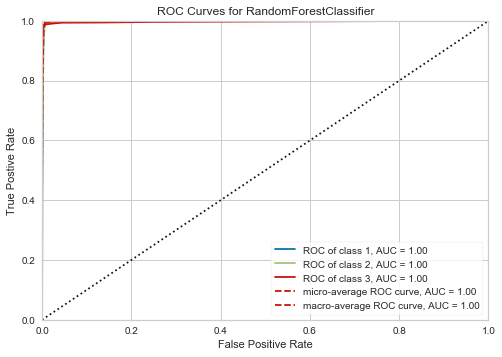

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.5s finished


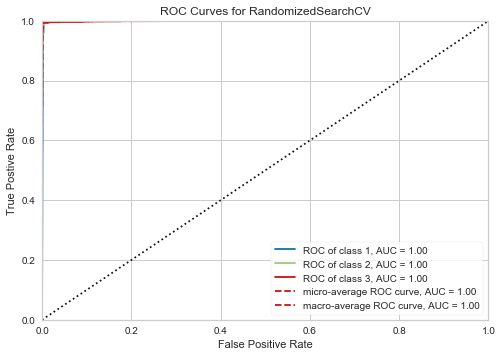

In [30]:
from yellowbrick.classifier import ROCAUC

for classifier in classifiers:
    viz = ROCAUC(classifier)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.poof()